In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(filepath_or_buffer="weight-height.csv")
df.sample(3)

,Gender,Height,Weight
7394,Female,60.143322,118.797659
4820,Male,65.659505,151.627434
6801,Female,65.084167,137.168120


#### Checking how many womens and mens.

In [3]:
df.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

#### Change 'Weight' from pounds to kilograms.

In [4]:
df.Weight /= 2.2046

#### Change 'Height' from inches to centimeters.

In [5]:
df.Height *= 2.54

#### Change 'Gender' into binary.

In [6]:
df.Gender = df.Gender.map({"Female" : 1, "Male" : 0})

In [7]:
df.sample(n=10)

,Gender,Height,Weight
4646,0,175.675171,85.796453
1103,0,185.220273,97.035510
3687,0,184.240370,93.242216
7172,1,164.590460,66.241876
3835,0,168.731543,87.066356
7187,1,168.124052,67.849861
6451,1,161.164020,60.562230
8117,1,161.774429,55.172552
9021,1,164.132927,63.239069
5488,1,163.959136,60.469499


### Normal distribution

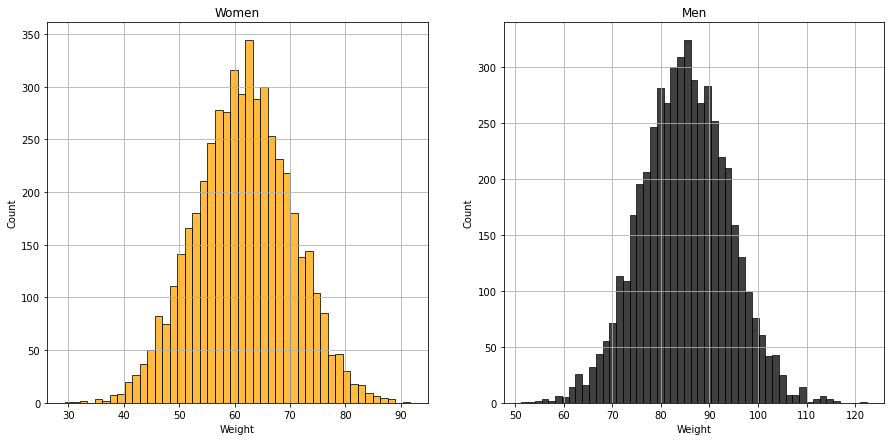

In [8]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(15,7))

sns.histplot(df.query("Gender==1").Weight, ax=ax1, color="orange")

sns.histplot(df.query("Gender==0").Weight, ax=ax2, color="k")
ax1.set_title("Women")
ax2.set_title("Men")
ax1.grid()
ax2.grid()
plt.show()

# Best body height

In [9]:
model_height = LinearRegression()
X = df[ ["Weight", "Gender"] ]
y = df[ ["Height"] ]
model_height.fit(X, y)

LinearRegression()

In [10]:
YOUR_WEIGHT = 72
YOUR_GENDER = 0 # Put 0 for Man, 1 for Woman


if 30 <= YOUR_WEIGHT <= 230 and YOUR_GENDER in [0,1]:
    print(f"Your best height is {model_height.predict([ [YOUR_WEIGHT, YOUR_GENDER] ] )[0][0]:.0f} cm.")
else:
    print("Put correct values!")

Your best height is 167 cm.


# Best body weight

In [11]:
model_weight = LinearRegression()
X = df[ ["Height", "Gender"] ]
y = df[ ["Weight"] ]
model_weight.fit(X, y)

LinearRegression()

In [12]:
YOUR_HEIGHT = 185
YOUR_GENDER = 0 # Put 0 for Man, 1 for Woman

if 50 <= YOUR_HEIGHT <= 240 and YOUR_GENDER in [0,1]:
    print(f"Your best weight is {model_weight.predict([ [YOUR_HEIGHT, YOUR_GENDER] ] )[0][0]:.0f} kg.")
else:
    print("Put correct values!")

Your best weight is 95 kg.
